In [1]:
import pandas as pd
import numpy as np
import alphalens as al
import pyfolio as pf
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

/Users/pasin/Codes/Python/_investments/env/lib/python3.11/site-packages/pyfolio/pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


In [2]:
factor_data = pd.read_csv('./test/alphalens/factor_data/factor_data_AI_ALPHA.csv', index_col=['date', 'asset'], parse_dates=['date'])

In [3]:
factor_data.head()

1D        5D       10D    factor  factor_quantile
date       asset                                                          
2015-01-05 AEONTS  0.004630  0.027778  0.041667  0.466496              2.0
2015-01-06 AEONTS  0.004608  0.027650  0.078341  0.466496              2.0
2015-01-07 AEONTS  0.009174  0.022936  0.082569  0.466501              2.0
2015-01-08 AEONTS  0.000000  0.013636  0.054545  0.466492              2.0
2015-01-09 AEONTS  0.009091  0.018181  0.045454  0.466496              2.0

In [4]:
# set parameters
demeaned = False
group_adjust = False
equal_weight = False

Returns Analysis


1D     5D    10D
Ann. alpha                                     0.000  0.000  0.000
beta                                           1.000  1.000  1.000
Mean Period Wise Return Top Quantile (bps)     5.660  5.594  5.592
Mean Period Wise Return Bottom Quantile (bps)  3.682  3.811  3.885
Mean Period Wise Spread (bps)                  1.978  1.851  1.804

<Figure size 1800x2000 with 0 Axes>

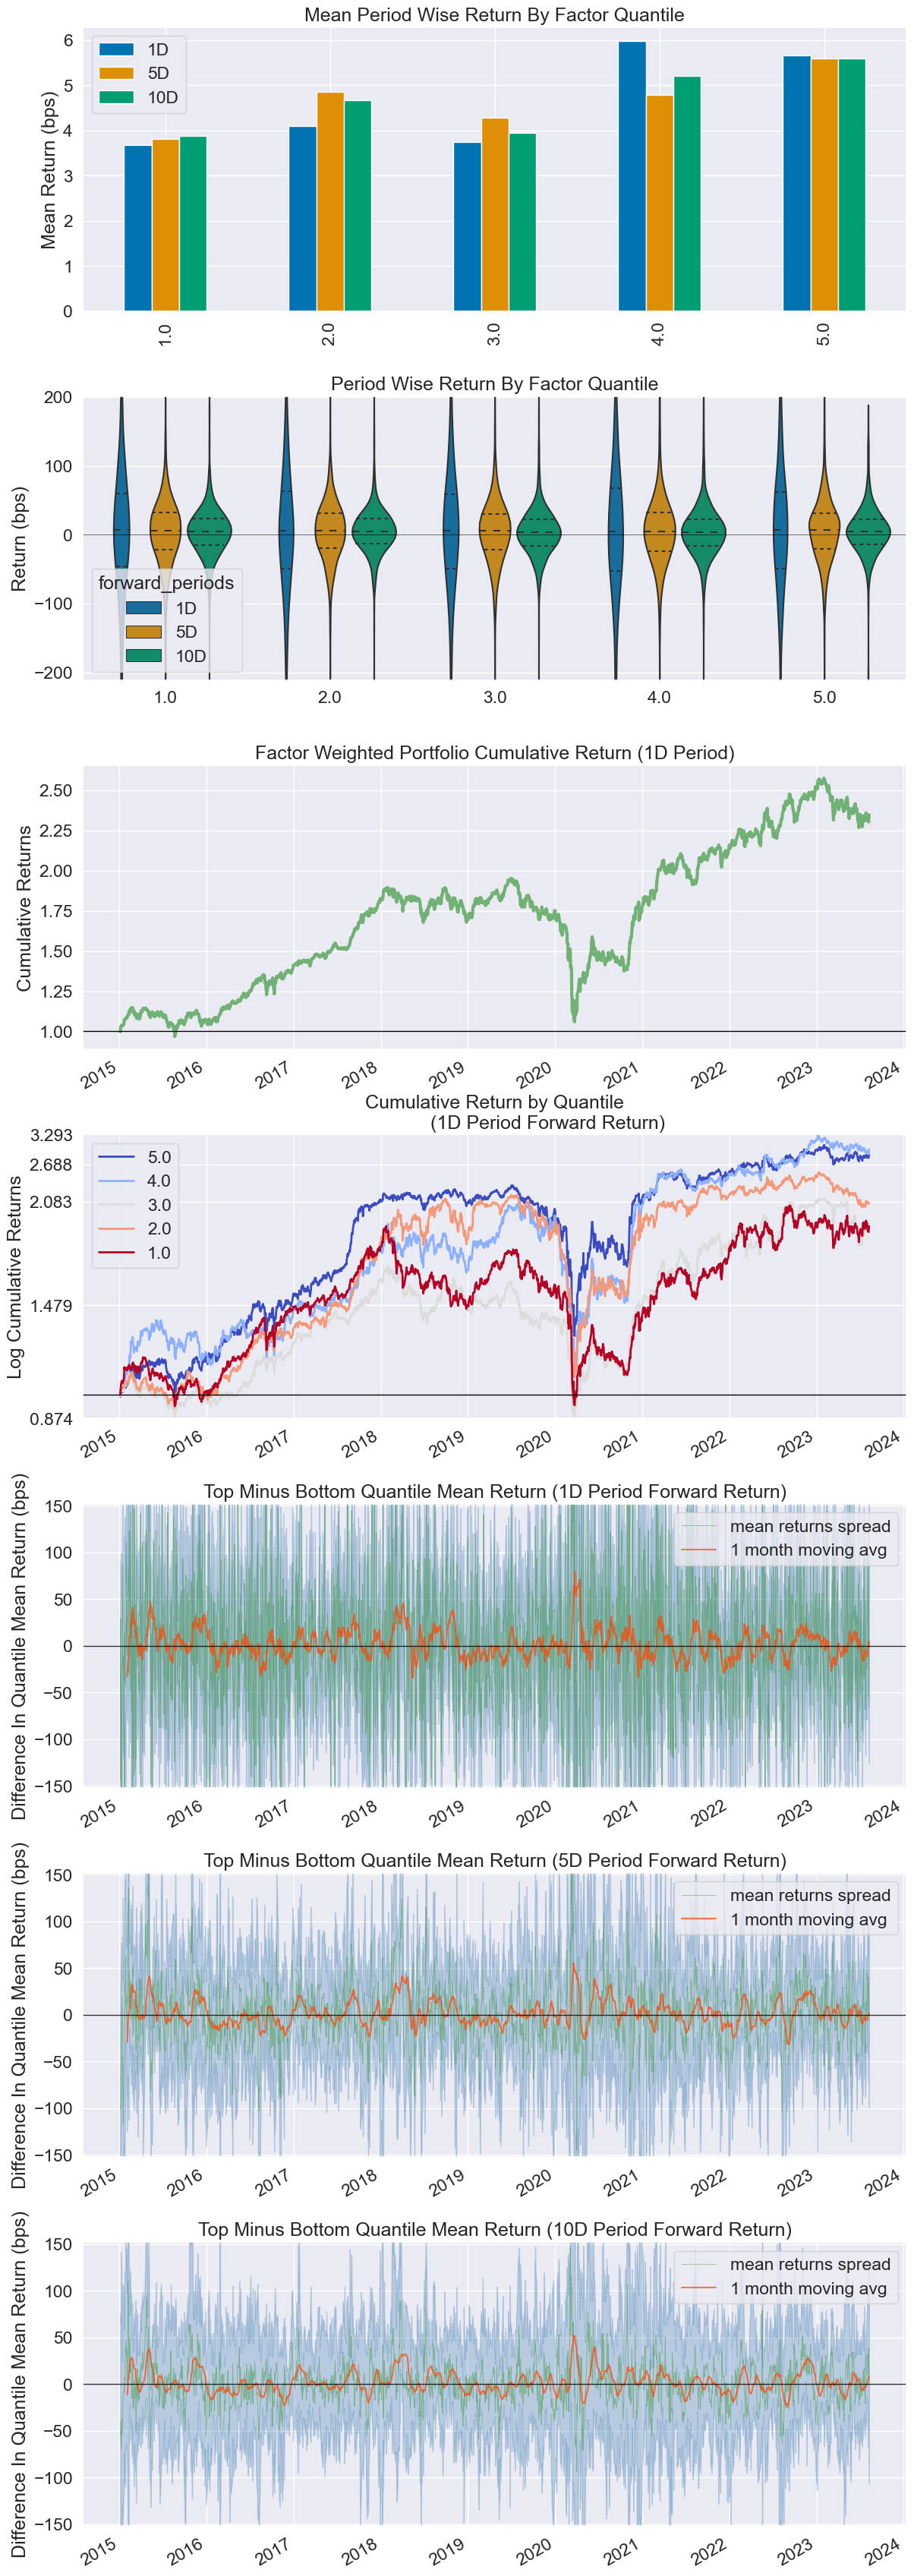

In [5]:
# Return analysis
plt.figure(figsize=(18, 20))
al.tears.create_returns_tear_sheet(factor_data,
                                   long_short=False,
                                   group_neutral=False,
                                   by_group=False)

Information Analysis


1D     5D    10D
IC Mean           0.002  0.002  0.004
IC Std.           0.135  0.141  0.137
Risk-Adjusted IC  0.013  0.012  0.026
t-stat(IC)        0.583  0.546  1.199
p-value(IC)       0.560  0.585  0.231
IC Skew           0.017  0.054  0.149
IC Kurtosis      -0.208 -0.126 -0.225

<Figure size 640x480 with 0 Axes>

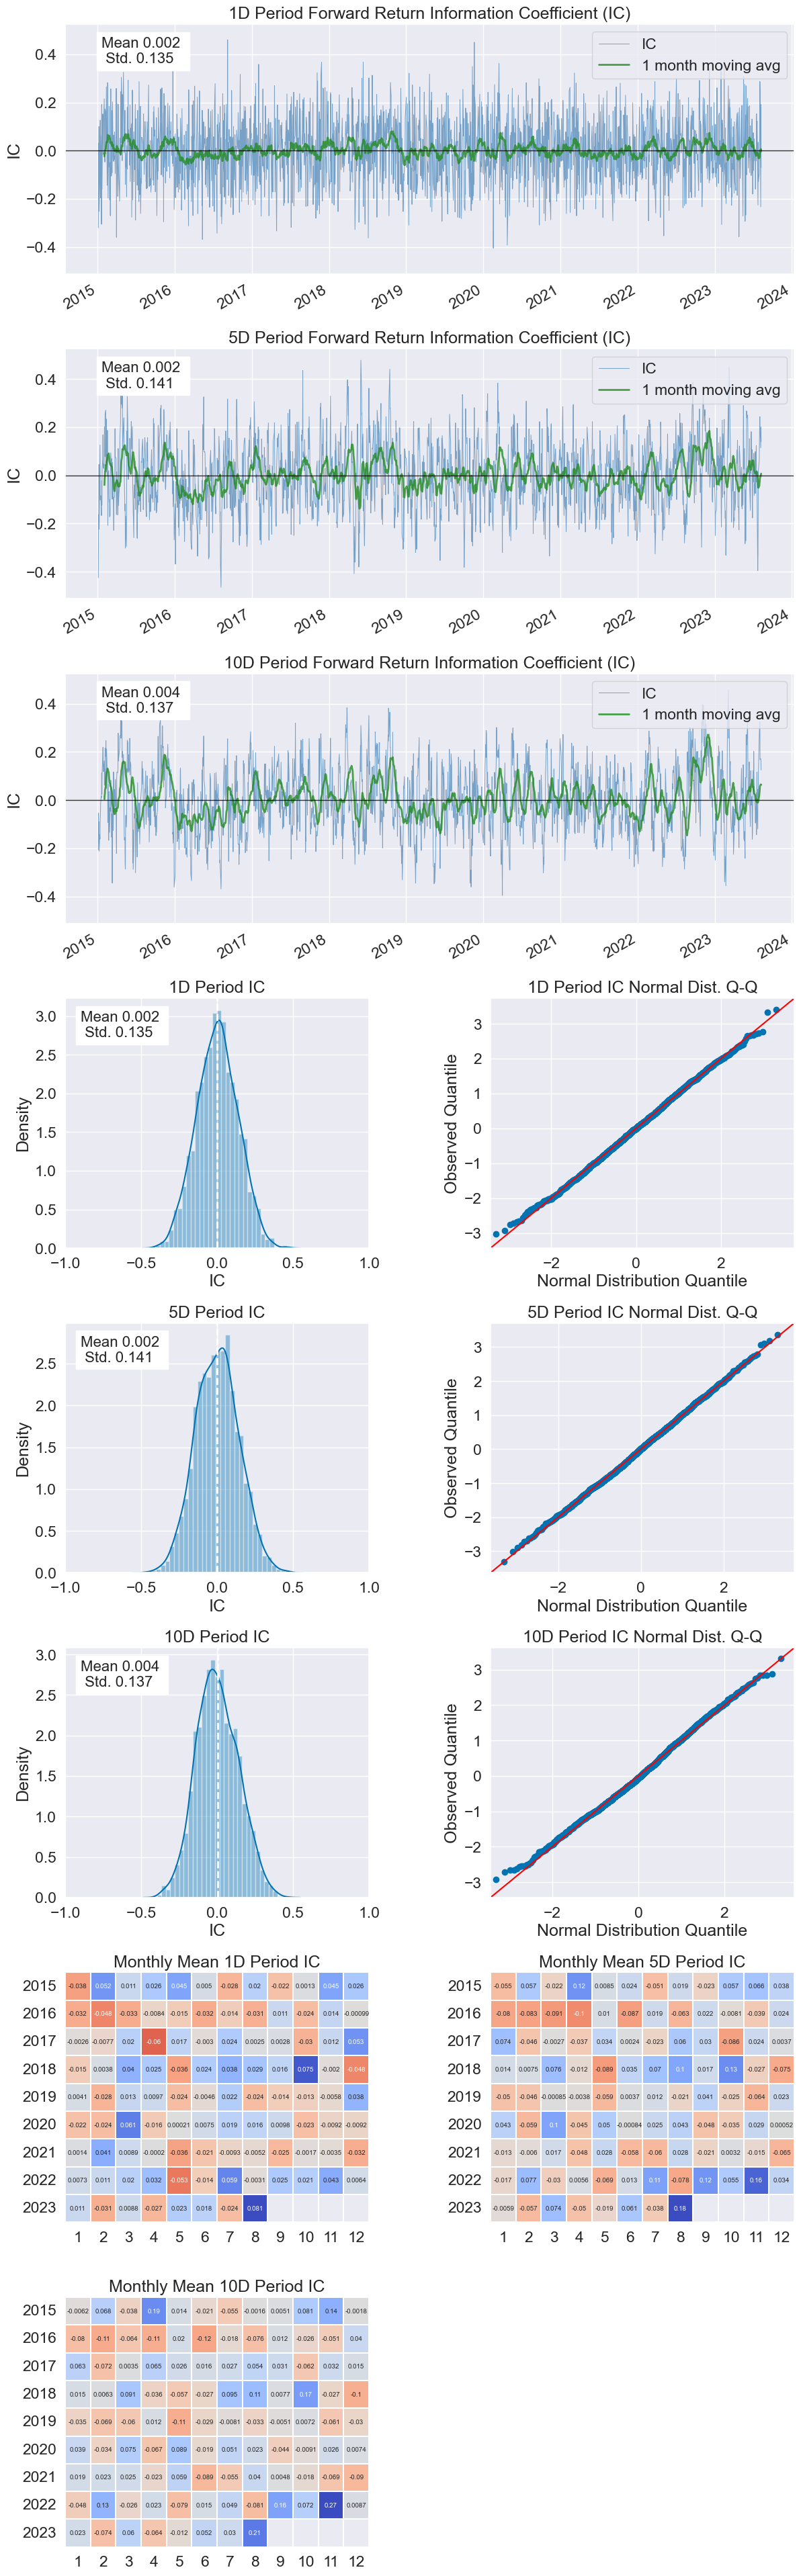

In [6]:
# Information coefficient analysis
al.tears.create_information_tear_sheet(factor_data,
                                       group_neutral=False,
                                       by_group=False)

Turnover Analysis


1D     5D    10D
Quantile 1.0 Mean Turnover   0.153  0.254  0.361
Quantile 2.0 Mean Turnover   0.349  0.430  0.492
Quantile 3.0 Mean Turnover   0.402  0.498  0.559
Quantile 4.0 Mean Turnover   0.561  0.670  0.710
Quantile 5.0 Mean Turnover   0.222  0.350  0.458

1D     5D    10D
Mean Factor Rank Autocorrelation  0.862  0.715  0.562

<Figure size 640x480 with 0 Axes>

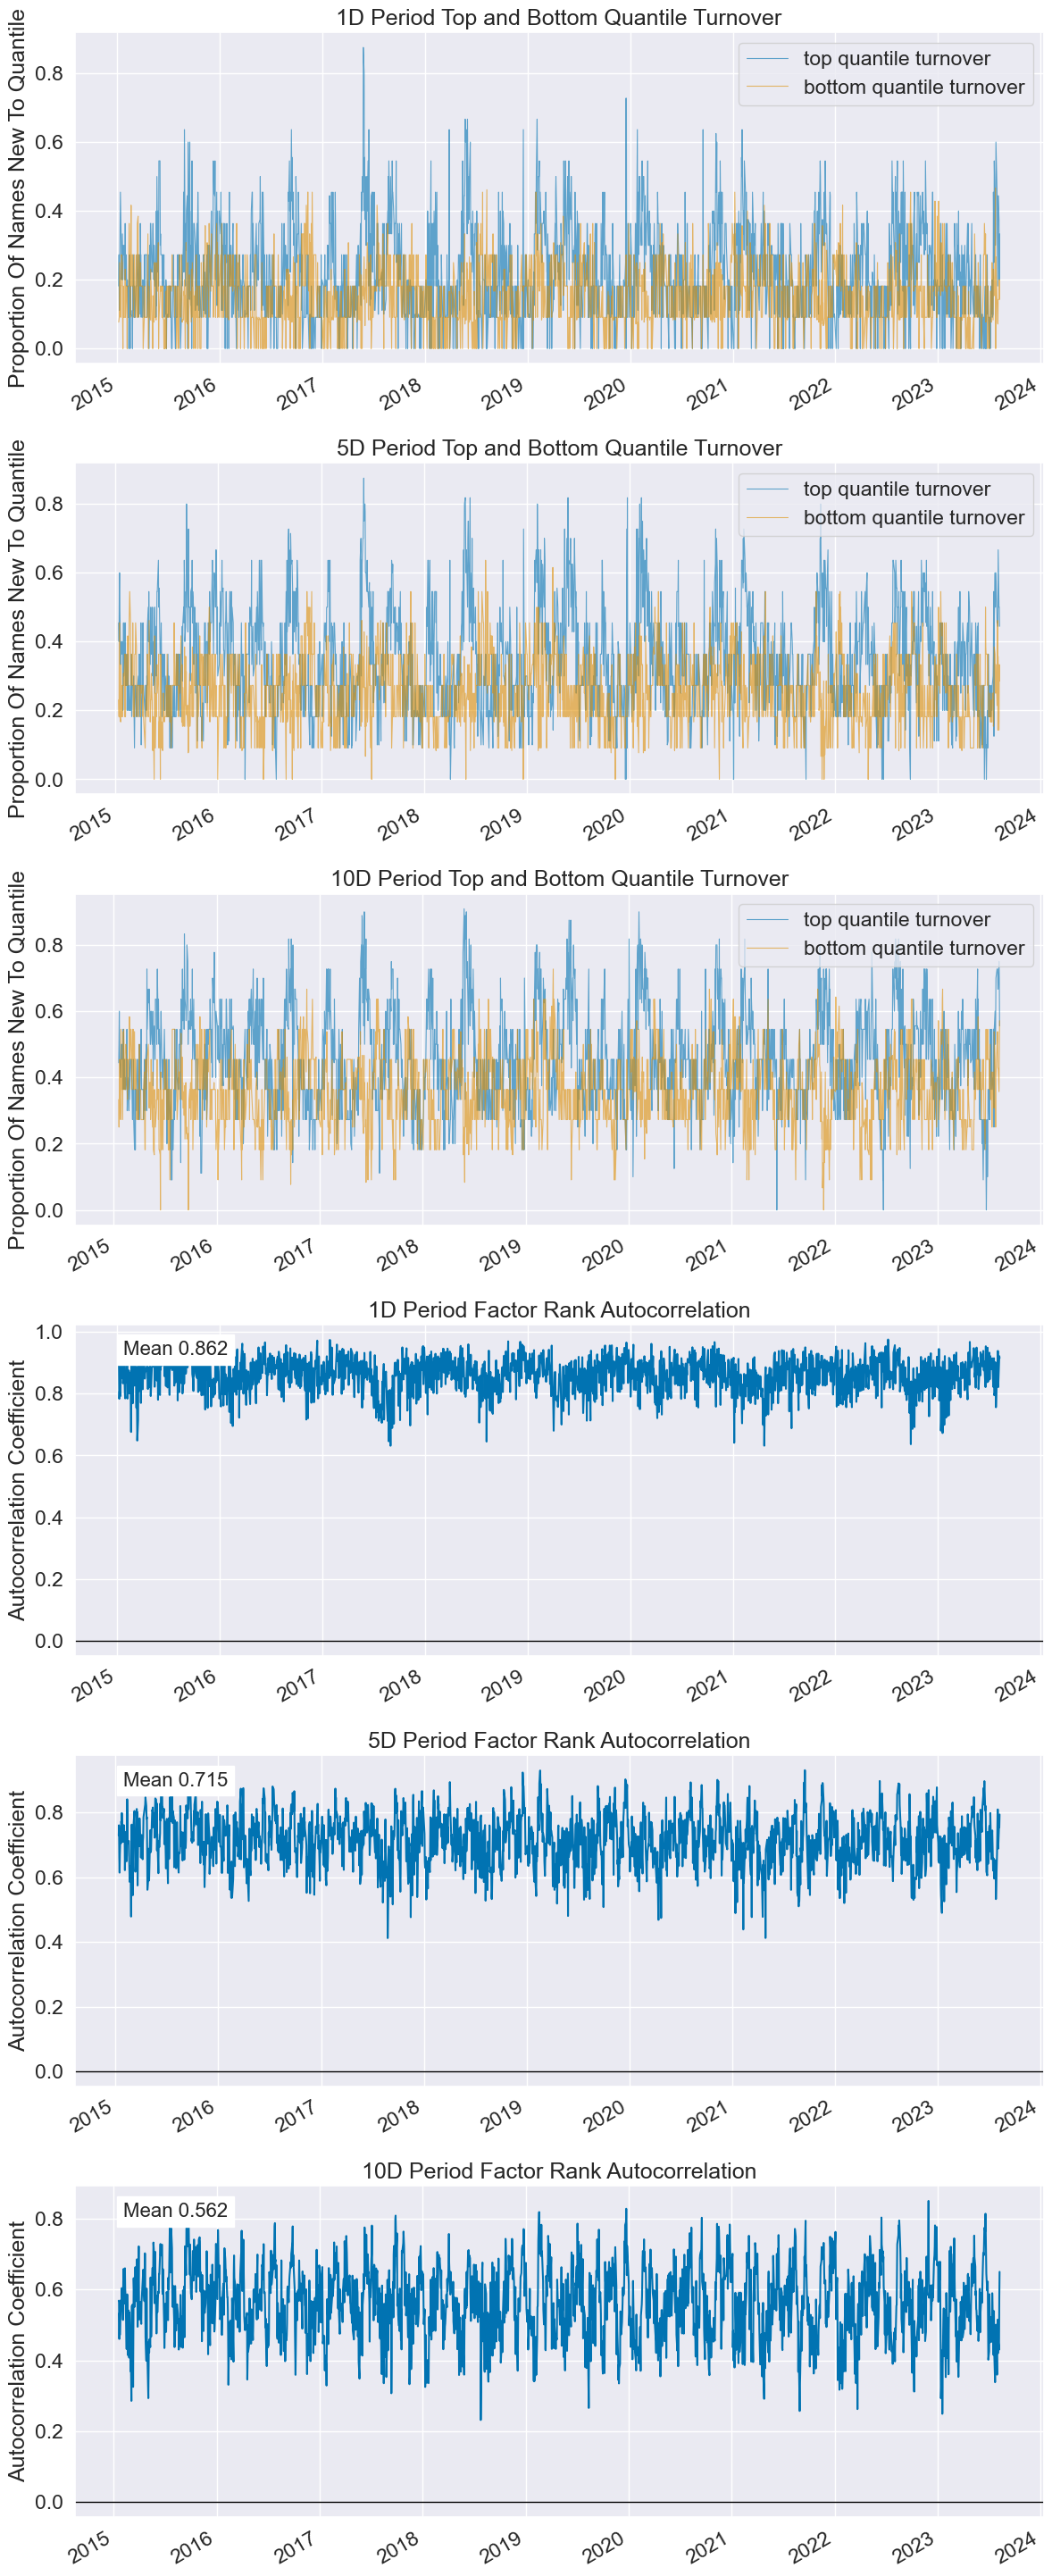

In [7]:
# Turnover analysis
# ! note that create_turnover_tear_sheet was modified since the original code throws an error. in the get_forward_returns_columns, I changed .get_values() to .values since the former does not exist in the current version of the library anymore (reference is in the cell below)
al.tears.create_turnover_tear_sheet(factor_data)

In [8]:
al.utils.get_forward_returns_columns(factor_data.columns, require_exact_day_multiple=True).values

array(['1D', '5D', '10D'], dtype=object)

<h1 style="color:turquoise">Pyfolio Input</h1>

In [9]:
pf_returns, pf_positions, pf_benchmark = al.performance.create_pyfolio_input(factor_data, period='5D', capital=1000000, long_short=False,
                                                                             group_neutral=False, equal_weight=True, quantiles=[1,5],
                                                                             groups=None, benchmark_period='1D')

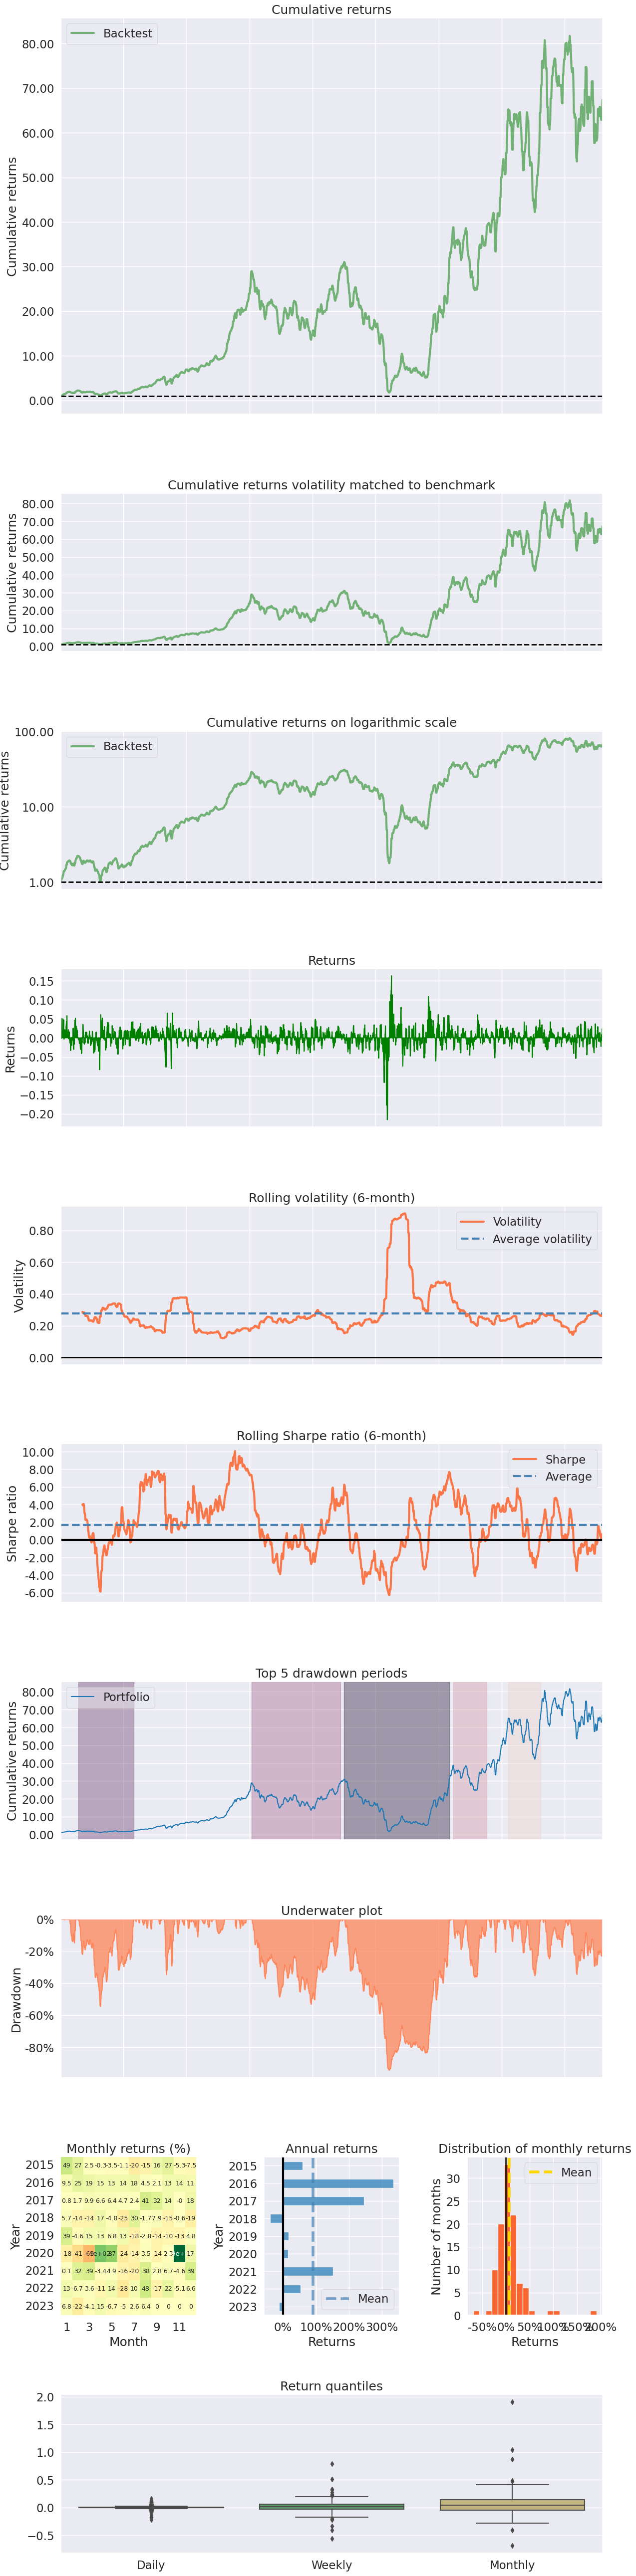

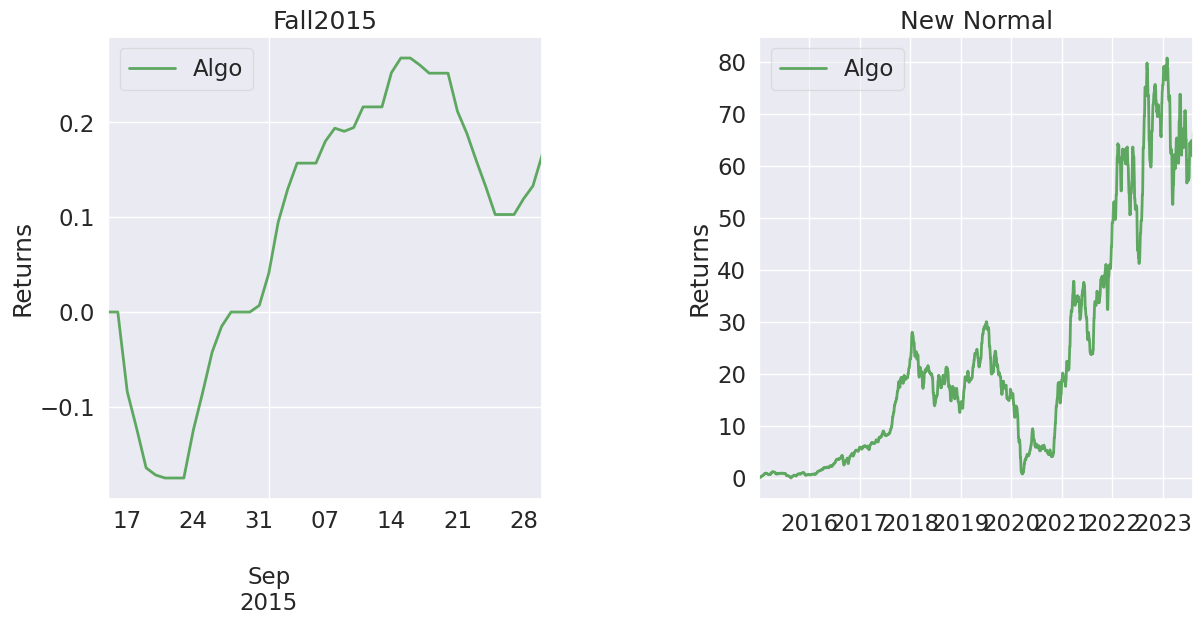

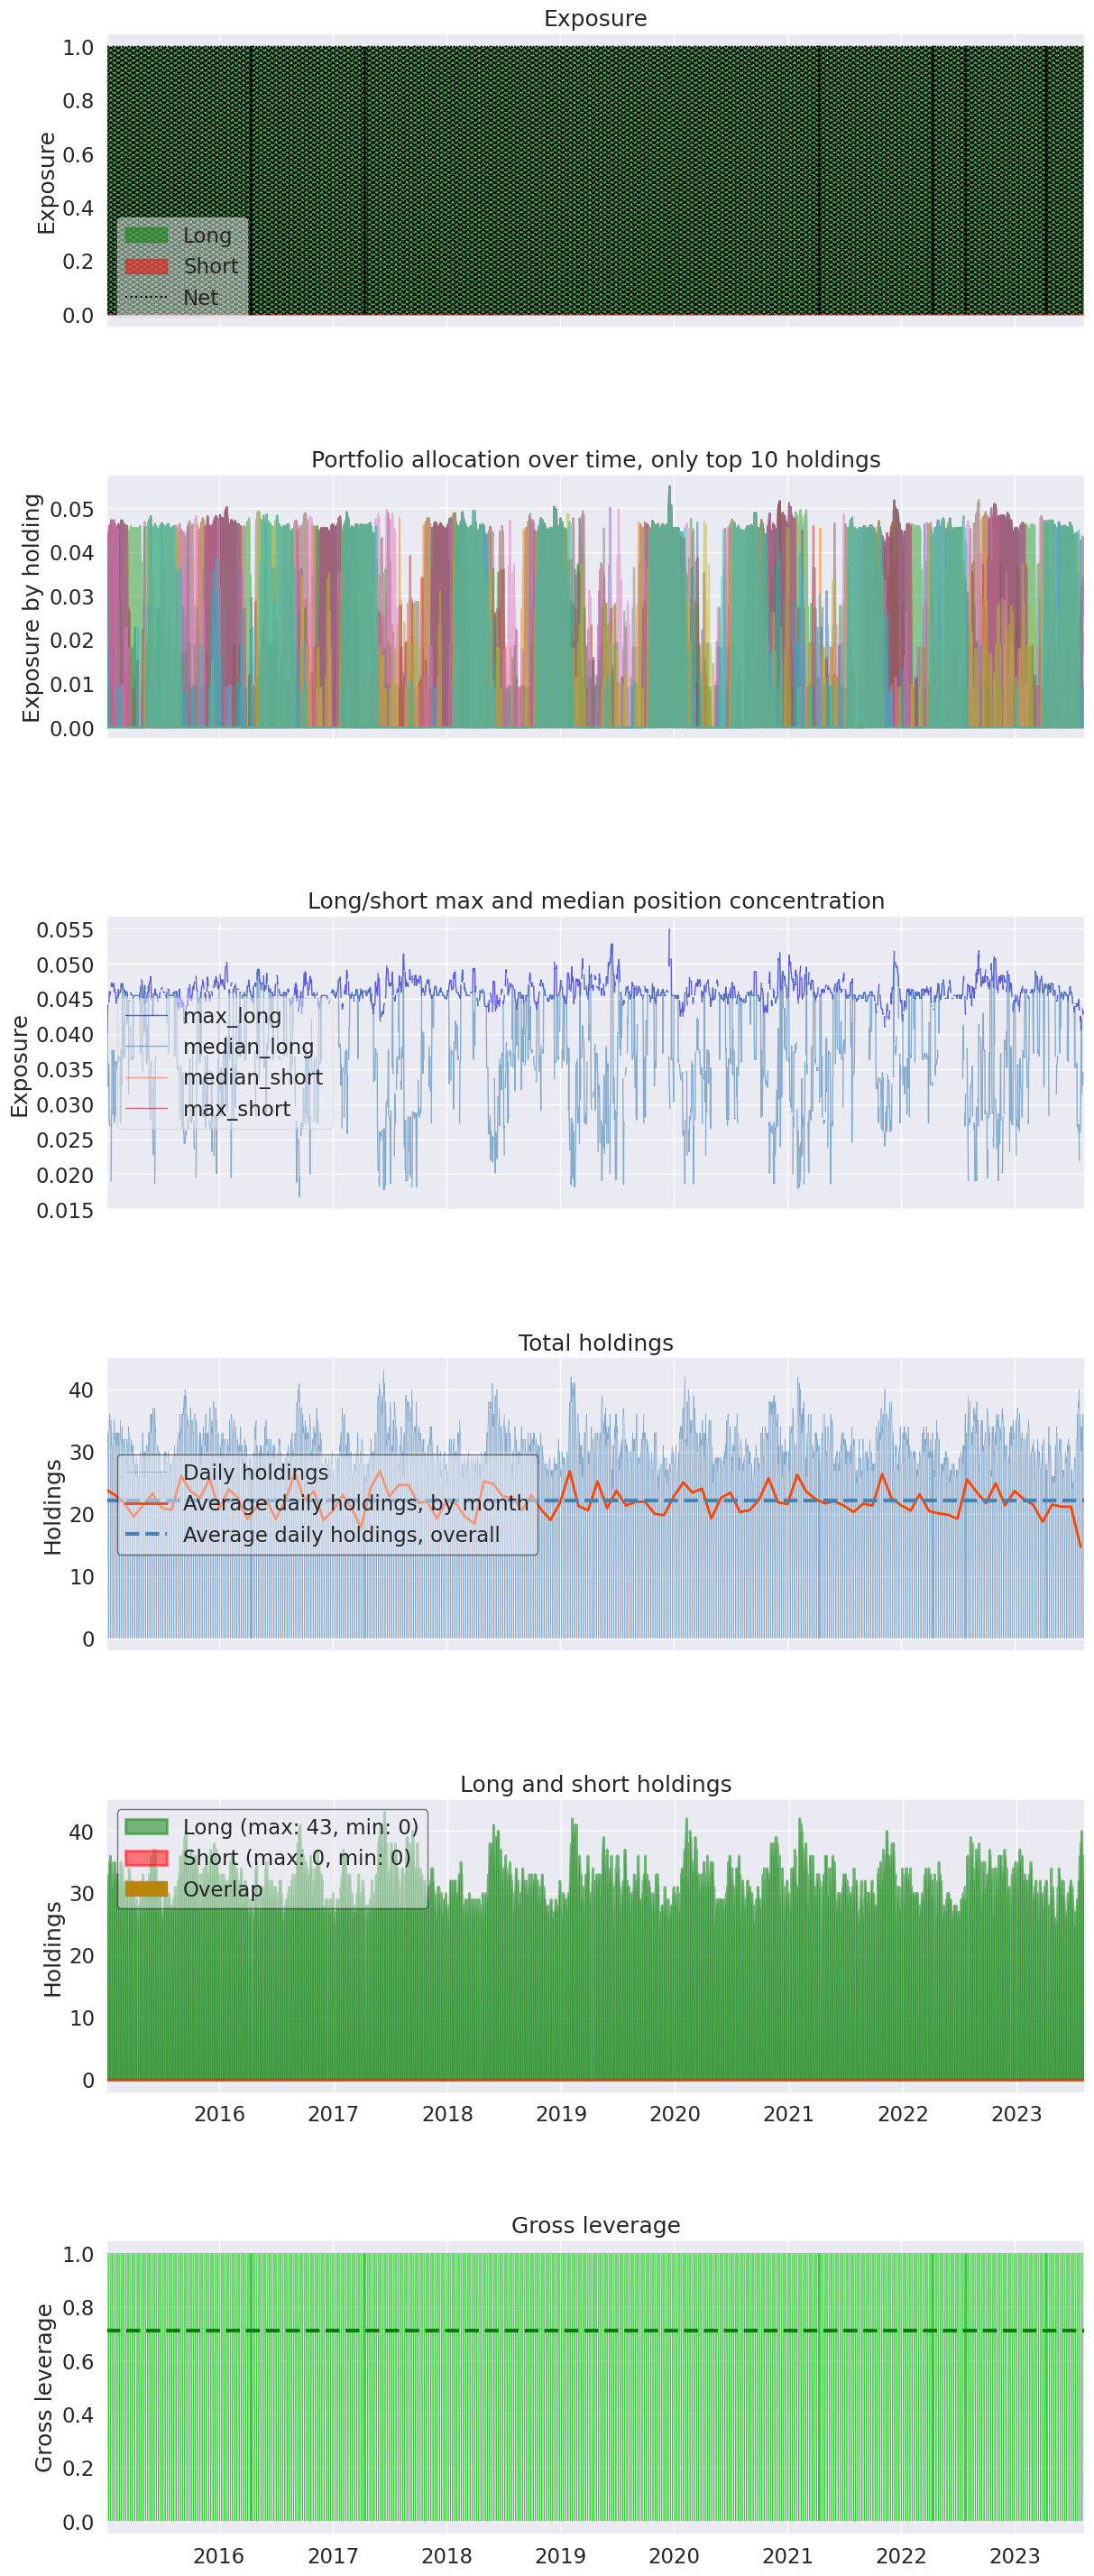

In [11]:
pf.tears.create_full_tear_sheet(pf_returns,
                                positions=pf_positions,
                                #benchmark_rets=pf_benchmark, # optional, default to SPY
                                hide_positions=True)

In [11]:
# positions = pf.utils.check_intraday('infer', pf_returns, pf_positions, None)

# create_returns_tear_sheet(
#         returns,
#         positions=positions,
#         transactions=None,
#         live_start_date=None,
#         cone_std=cone_std,
#         benchmark_rets=benchmark_rets,
#         bootstrap=bootstrap,
#         turnover_denom=turnover_denom,
#         header_rows=header_rows,
#         set_context=set_context)

# pf.tears.create_returns_tear_sheet(returns=pf_returns, positions=pf_positions)

In [12]:
# top = 5
# df_drawdowns = pd.DataFrame(index=list(range(top)),
#                             columns=['Net drawdown in %',
#                                         'Peak date',
#                                         'Valley date',
#                                         'Recovery date',
#                                         'Duration'])

# for i, (peak, valley, recovery) in enumerate(drawdown_periods):
#     print(f'Valley = {valley}')
#     if pd.isnull(recovery):
#         df_drawdowns.loc[i, 'Duration'] = np.nan
#     else:
#         df_drawdowns.loc[i, 'Duration'] = len(pd.date_range(peak,
#                                                             recovery,
#                                                             freq='B'))
        
#         # ! add casting int to float
#         df_drawdowns.loc[i, 'Peak date'] = (peak.to_pydatetime()
#                                             .strftime('%Y-%m-%d'))
#         df_drawdowns.loc[i, 'Valley date'] = (valley.to_pydatetime()
#                                               .strftime('%Y-%m-%d'))
#         if isinstance(recovery, float):
#             df_drawdowns.loc[i, 'Recovery date'] = recovery
#         # ! this elif part was added to debug datatype
#         elif isinstance(recovery, int):
#             df_drawdowns.loc[i, 'Recovery date'] = recovery.astype(float)
#         else:
#             df_drawdowns.loc[i, 'Recovery date'] = (recovery.to_pydatetime()
#                                                     .strftime('%Y-%m-%d'))
#         # df_drawdowns.loc[i, 'Net drawdown in %'] = (
#             # (df_cum.loc[peak] - df_cum.loc[valley]) / df_cum.loc[peak]) * 100

In [13]:
df_cum = pf.timeseries.cum_returns(pf_returns, 1.0)
running_max = np.maximum.accumulate(df_cum)
underwater = df_cum / running_max - 1

In [14]:
valley_index = np.argmin(underwater)  # end of the period
valley = underwater.index[valley_index]
# Find first 0
peak = underwater[:valley_index][underwater[:valley_index] == 0].index[-1]
# Find last 0
try:
    recovery = underwater[valley_index:][underwater[valley_index:] == 0].index[0]
except IndexError:
    recovery = np.nan  # drawdown not recovered

In [15]:
valley

Timestamp('2020-03-20 00:00:00', freq='D')